<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/SoftwareDesign202010_01/SoftwareDesign202010_0103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SoftwareDesign 2020年10月号第一特集 Pythonではじめる統計学

公式のサンプルコードの写経

## 第3章 シミュレーションで学ぶ確率分布

* SciPyのパッケージ
  * ベルヌーイ分布 scipy.stats.bernoulli
  * 二項分布 scipy.stats.binom
  * 正規分布 scipy.stats.norm


In [2]:
# 基本ライブラリ
import pandas as pd
import numpy as np
import numpy.random as rd
import scipy.stats as st
from tqdm import tqdm
from IPython.display import display

# グラフ描画系
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import seaborn as sns

# plot settings
plt.rcParams["patch.force_edgecolor"] = True
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

%config InlineBackend.figure_format='retina'

In [3]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 8.5MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp36-none-any.whl size=4120275 sha256=cdfa166ece7970f4c613bc7354f39d8062e2984f4edcd400e2b7c338845e06d8
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [4]:
import japanize_matplotlib

### ベルヌーイ分布

* 図２ ベルヌーイ分布のシミュレーション例

In [5]:
# コード7: ベルヌーイ分布に従う試行のシミュレーション
import scipy
from collections import Counter

np.random.seed(71)
n_trial = 10
x = scipy.stats.bernoulli.rvs(p=0.5, size=n_trial)
print(f"10回のベルヌーイ試行の結果：{x}")

cnt = Counter(x)
print(f"表が出た回数{cnt[1]}、裏が出た回数{cnt[0]}")

10回のベルヌーイ試行の結果：[0 0 1 0 1 1 1 1 1 0]
表が出た回数6、裏が出た回数4


In [6]:
# コード7の実刑回数10000回
np.random.seed(71)
n_trial = 10000
x = scipy.stats.bernoulli.rvs(p=0.5, size=n_trial)
print(f"10000回のベルヌーイ試行の結果：{x}")

cnt = Counter(x)
print(f"表が出た回数{cnt[1]}、裏が出た回数{cnt[0]}")
print(f"表が出た確率{cnt[1]/n_trial:.3f}")

10000回のベルヌーイ試行の結果：[0 0 1 ... 0 1 0]
表が出た回数4991、裏が出た回数5009
表が出た確率0.499


### 二項分布

* 図３ 二項分布の式

$ P(x, p, n) = \frac{n!}{x! (n-x)} p^x (1-p)^{n-x} $

In [7]:
import math

* 図４ 二項分布を使って各値が出る確率を算出
  * 試行回数１０回、成功確率０．２

In [8]:
# コード8: 二項分布を使って各値がでる確率を算出
def binomial(x, n, p):
  return (math.factorial(n) / (math.factorial(x) * math.factorial(n - x))) * (p ** x) * (1 - p) ** (n - x) 

np.random.seed(71)
n = 10
p = 0.2
binomial_prob = {}
for x in range(n+1):
  binomial_prob[x] = binomial(x, n, p)

for x in range(n+1):
  print(f"x:{x}, {binomial_prob[x]*100:.1f}%")

x:0, 10.7%
x:1, 26.8%
x:2, 30.2%
x:3, 20.1%
x:4, 8.8%
x:5, 2.6%
x:6, 0.6%
x:7, 0.1%
x:8, 0.0%
x:9, 0.0%
x:10, 0.0%


* 図５ p=0.1、n=10の二項分布

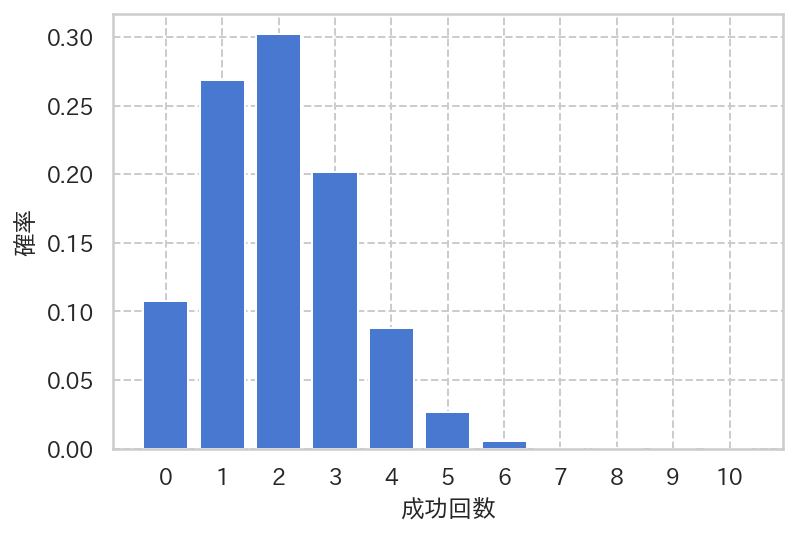

In [9]:
plt.bar(binomial_prob.keys(), binomial_prob.values())
plt.xticks(range(11))
plt.xlabel("成功回数")
plt.ylabel("確率")
plt.show()

* 図６ 二項分布のシミュレーション

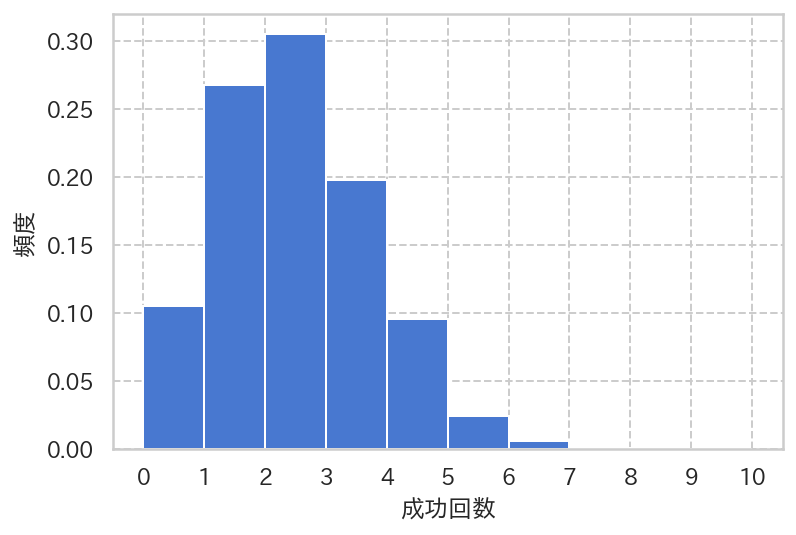

In [10]:
# コード9: 二項分布のシミュレーション
from scipy.stats import bernoulli
np.random.seed(71)
# ベルヌーイ分布に従う乱数を生成
def gen_bern_var(n, p):
  return np.sum(bernoulli.rvs(p, size=n))

n_trial = 10000
n = 10
p = 0.2
result = []
for i in range(n_trial):
  result += [gen_bern_var(n=n, p=p)]
plt.hist(result, bins=range(n+1),density=True)
plt.xticks(range(n+1))
plt.xlabel("成功回数")
plt.ylabel("頻度")
plt.show()

In [11]:
def variance(x):
  mean_val = np.mean(x)
  n_data = len(x)
  sum_val = 0
  for i in range(len(x)):
    sum_val += (x[i] - mean_val) ** 2
  return sum_val / n_data

def standard_deviation(x):
  return np.sqrt(variance(x))

In [12]:
# 平均
np.mean(result)

2.0099

In [13]:
# 標準偏差
standard_deviation(result)

1.2594451119440613

In [14]:
from scipy.stats import binom
[binom.pmf(x, n=10, p=0.2) for x in range(11)]

[0.1073741824,
 0.2684354560000003,
 0.301989888,
 0.20132659200000022,
 0.08808038400000008,
 0.02642411520000004,
 0.00550502400000001,
 0.0007864320000000006,
 7.372800000000005e-05,
 4.096000000000007e-06,
 1.0240000000000004e-07]

In [15]:
# 大数の法則

In [16]:
# 表の出る確率が0.6のコインを10回投げるシミュレーションを3回実行
np.random.seed(71)
p = 0.6
x = st.bernoulli.rvs(0.6, size=10)
print(np.sum(x) / len(x))

x = st.bernoulli.rvs(0.6, size=20)
print(np.sum(x) / len(x))

x = st.bernoulli.rvs(0.6, size=50)
print(np.sum(x) / len(x))


0.4
0.6
0.62


* 図７ コイン投げを１０万回実行した結果（出力グラフは一部抜粋）

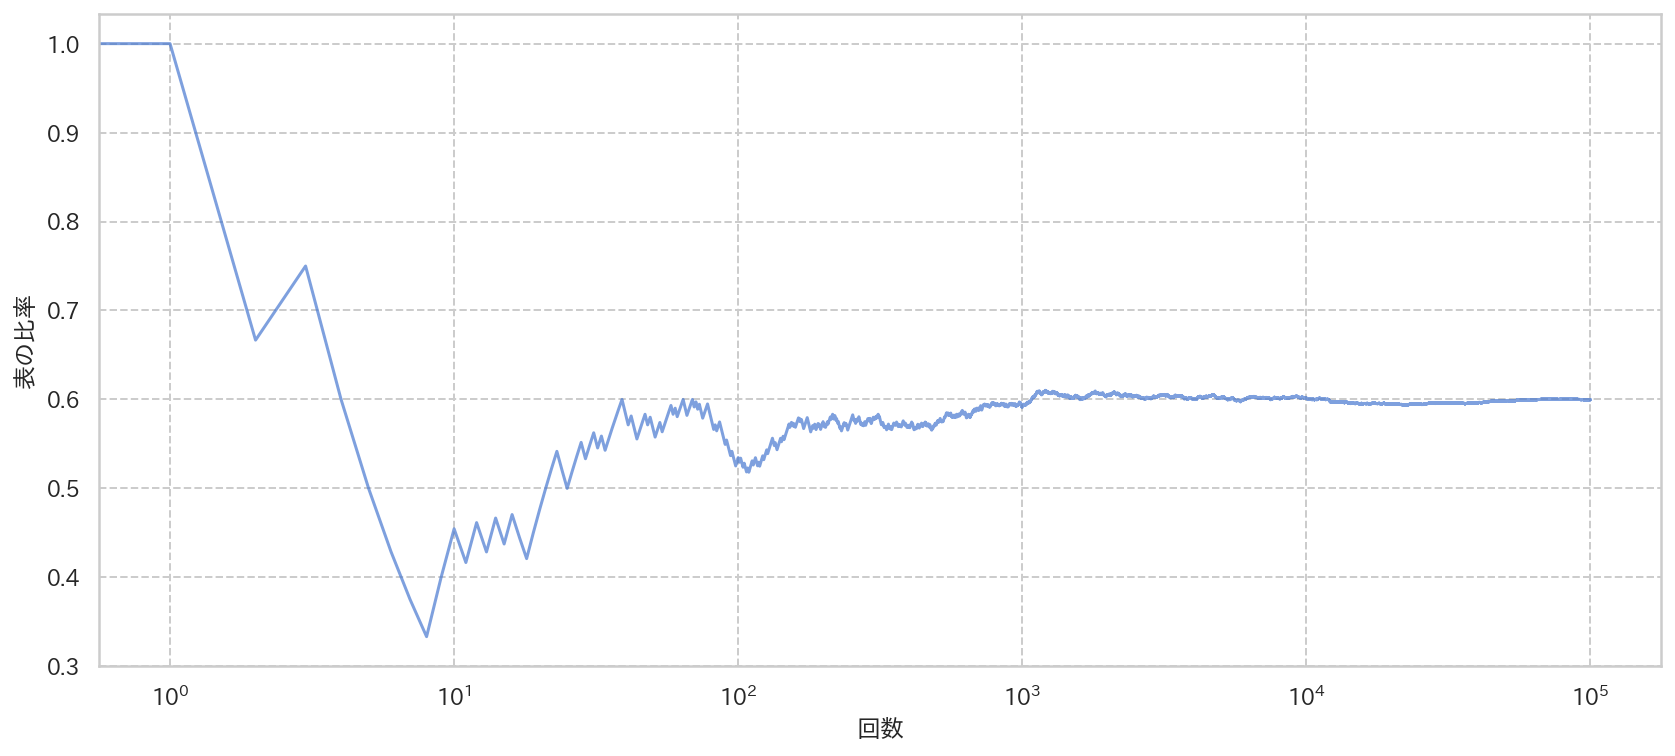

In [17]:
# コード10: コイン投げを10万回実行したシミュレーションの各時点の表の比率のグラフ
def create_averate_ts(result_list):
  # 1が出た比率を逐次求める関数
  ave_result = []
  ave_val = 0
  for i, result in enumerate(result_list):
    n = i + 1
    ave_val = (ave_val * (n - 1) + result) / n
    ave_result.append(ave_val)
  return ave_result

np.random.seed(71)
p = 0.6
n_sample = 100000

np.random.seed(71)
plt.figure(figsize=(14,6))
x = st.bernoulli.rvs(p, size=n_sample)
x_ave = create_averate_ts(x)
plt.plot(x_ave, alpha=0.7)
plt.xscale("log")
plt.xlabel("回数")
plt.ylabel("表の比率")
plt.show()

100%|██████████| 30/30 [00:03<00:00,  7.65it/s]


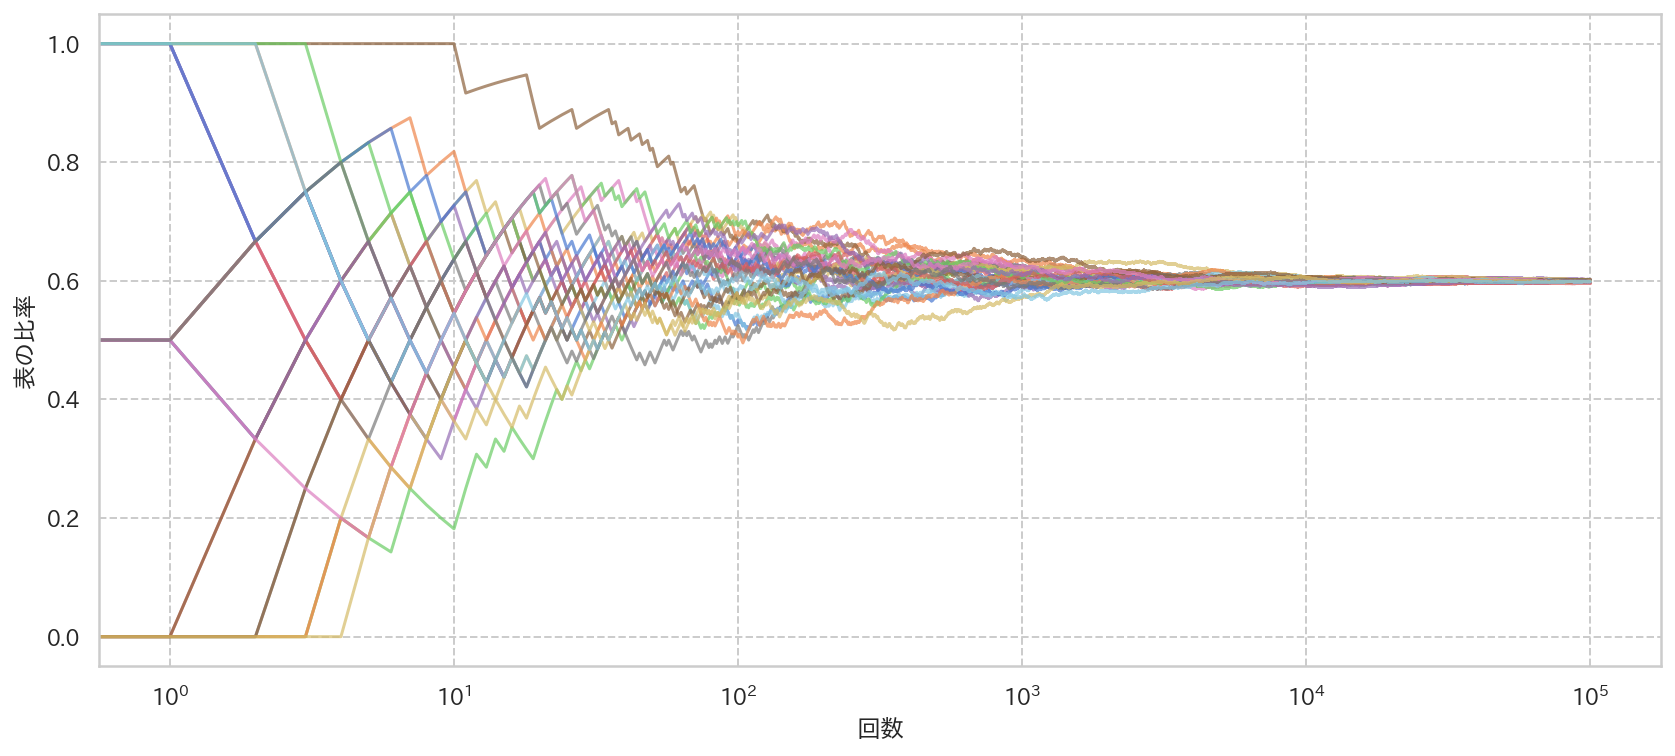

In [18]:
# コード１０の実験を３０回繰り返す
n_trial = 30
np.random.seed(71)
plt.figure(figsize=(14,6))
for i in tqdm(range(n_trial)):
  x = st.bernoulli.rvs(p, size=n_sample)
  x_ave = create_averate_ts(x)
  plt.plot(x_ave, alpha=0.7)
  plt.xscale("log")
  plt.xlabel("回数")
  plt.ylabel("表の比率")

plt.show()

* 図９ 確率密度関数と累積分布関数の関係
  * 確率密度関数のグラフで水色（ -∞から-0.5まで）の面積は0.308 になり、また、累積分布関数の-0.5に対応する確率も0.308を指す

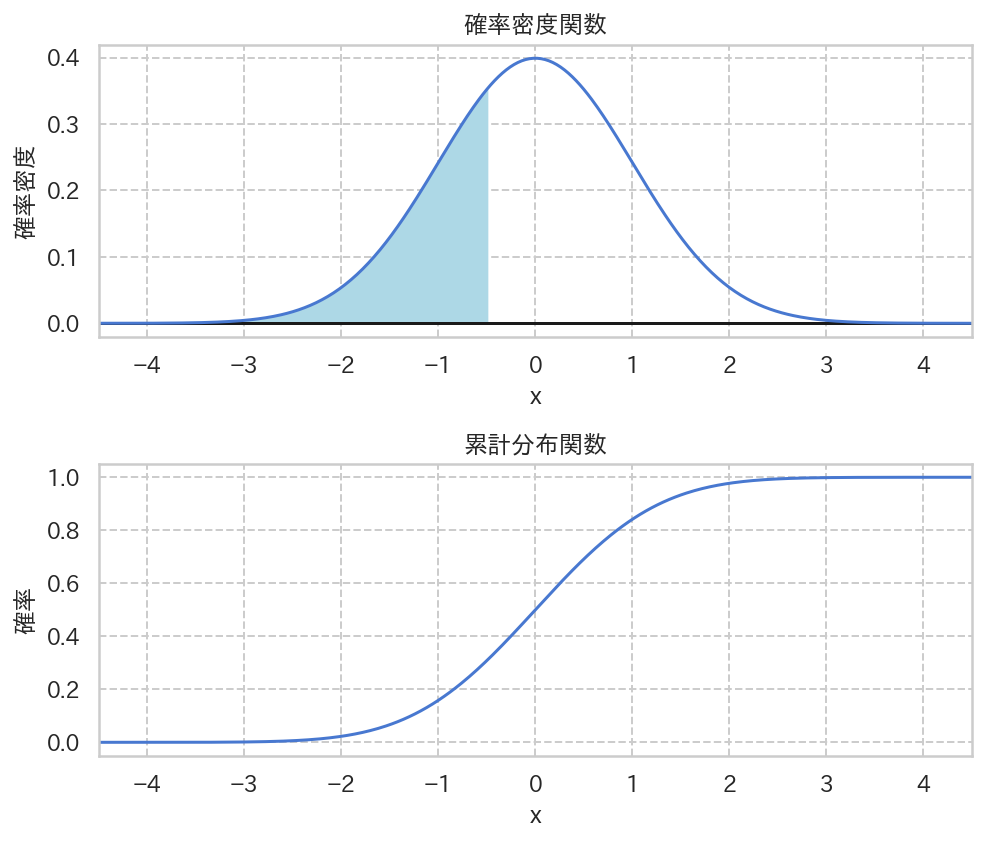

In [19]:
from scipy.stats import norm
xx = np.linspace(-5, 5, 501)
xx2 = np.linspace(-5, -0.5, 101)

plt.figure(figsize=(7,6))
ax = plt.subplot(211)
plt.plot([-5, 5], [0, 0], c="k")
plt.plot(xx, norm.pdf(xx, 0, 1))
plt.fill_between(xx2, norm.pdf(xx2, 0, 1), color="lightblue")
plt.xlabel("x")
plt.ylabel("確率密度")
plt.xlim(-4.5, 4.5)
plt.title("確率密度関数")

ax = plt.subplot(212)
plt.plot(xx, norm.cdf(xx, 0, 1))
plt.xlabel("x")
plt.ylabel("確率")
plt.xlim(-4.5, 4.5)
plt.title("累計分布関数")
plt.tight_layout()
plt.show()

* 図１０ 特定の範囲に入る確率を考える

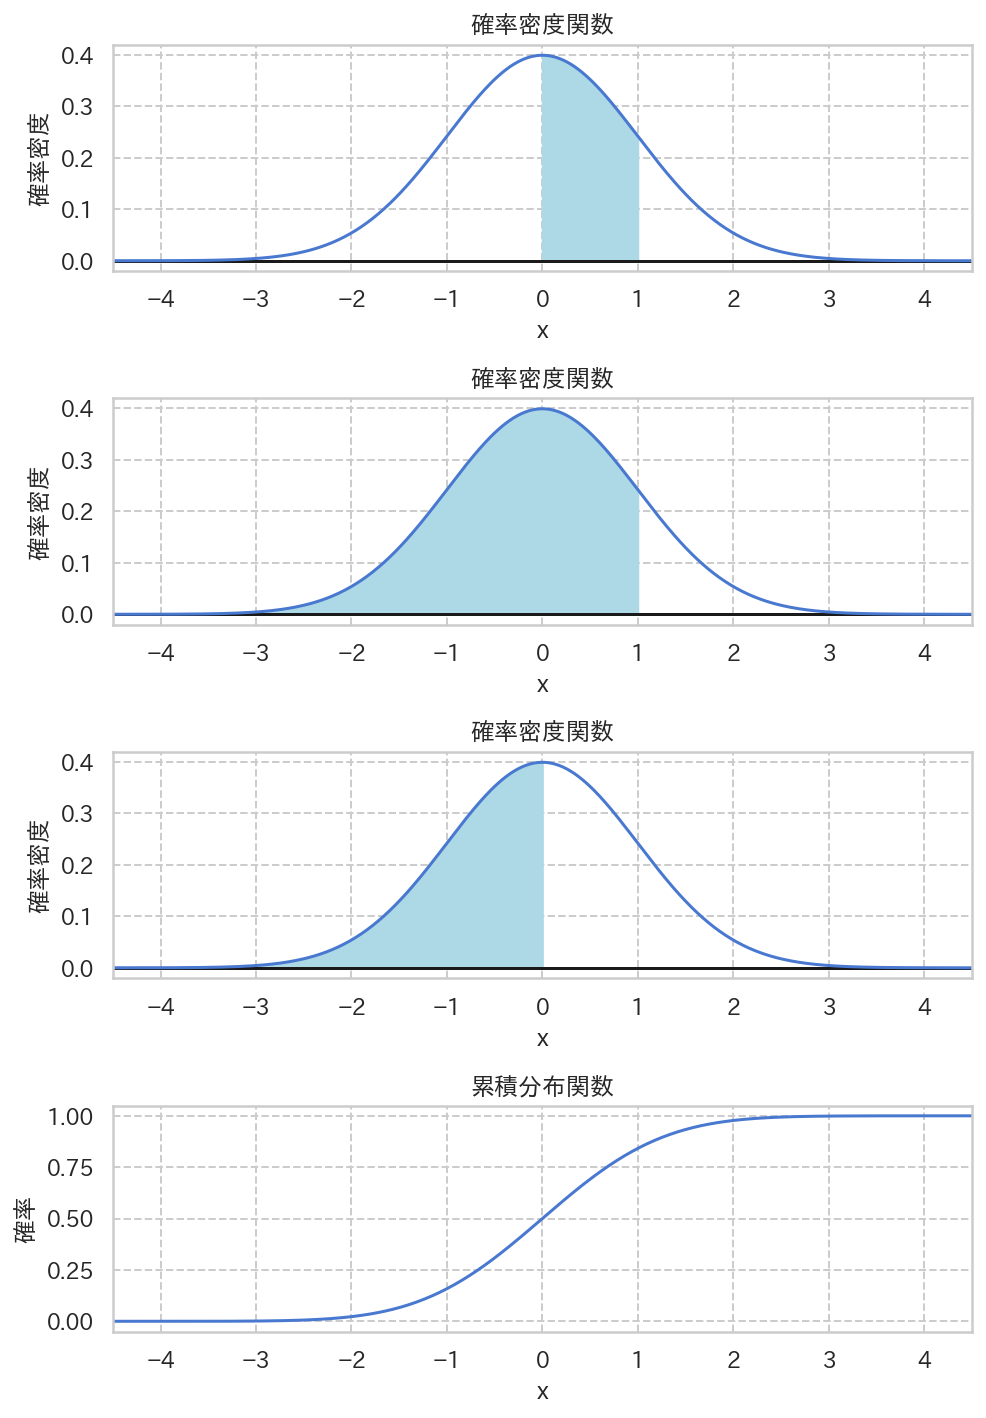

In [20]:
xx = np.linspace(-5, 5, 501)
plt.figure(figsize=(7,10))

# --------------
ax = plt.subplot(411)
xx2 = np.linspace(0, 1, 101)
plt.plot([-5, 5], [0, 0], c="k")
plt.plot(xx, norm.pdf(xx, 0, 1))
plt.fill_between(xx2, norm.pdf(xx2, 0, 1), color="lightblue")
plt.xlabel("x")
plt.ylabel("確率密度")
plt.xlim(-4.5, 4.5)
plt.title("確率密度関数")

# ---------------
ax = plt.subplot(412)
xx2 = np.linspace(-5, 1, 101)
plt.plot([-5, 5], [0, 0], c="k")
plt.plot(xx, norm.pdf(xx, 0, 1))
plt.fill_between(xx2, norm.pdf(xx2, 0, 1), color="lightblue")
plt.xlabel("x")
plt.ylabel("確率密度")
plt.xlim(-4.5, 4.5)
plt.title("確率密度関数")

# ---------------
ax = plt.subplot(413)
xx2 = np.linspace(-5, 0, 101)
plt.plot([-5, 5], [0, 0], c="k")
plt.plot(xx, norm.pdf(xx, 0, 1))
plt.fill_between(xx2, norm.pdf(xx2, 0, 1), color="lightblue")
plt.xlabel("x")
plt.ylabel("確率密度")
plt.xlim(-4.5, 4.5)
plt.title("確率密度関数")

# ---------------
ax = plt.subplot(414)
plt.plot(xx, norm.cdf(xx, 0, 1))
plt.xlabel("x")
plt.ylabel("確率")
plt.xlim(-4.5, 4.5)
plt.title("累積分布関数")

# ---------------
plt.tight_layout()
plt.show()

* 図１１ 正規分布の確率密度関数
  * $ P(x, \mu, \sigma) = \frac{1}{ \sqrt{ 2 \pi } \sigma }  exp ( - \frac{ ( x - \mu )^2 } { 2 \sigma^2 } ) $
  * $ \sigma $ は標準偏差を指し、 $ \mu $ は平均を指す

* 図１２ 平均５、標準偏差２の正規分布の確率密度関数

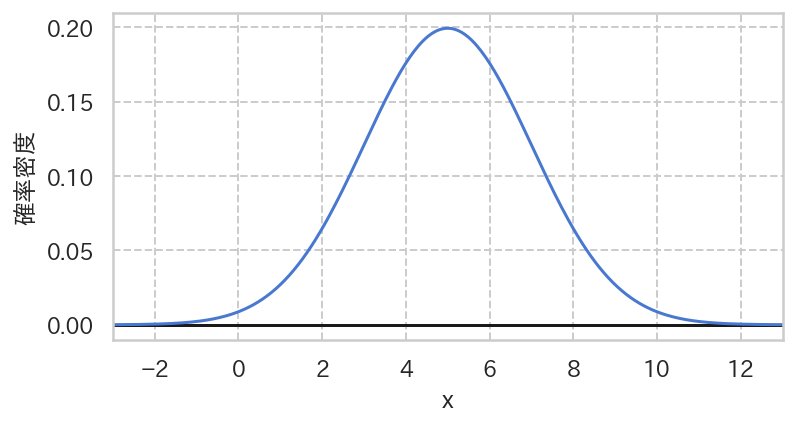

In [21]:
# コード11: 正規分布の確率密度関数とその描画コード
def normal_distribution(x, mu, sigma):
  return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(((x - mu)**2) / (2 * (sigma ** 2))))

xx = np.linspace(-3, 13, 301)
plt.figure(figsize=(6, 3))
plt.plot([-4, 14], [0, 0], c="k")
plt.plot(xx, normal_distribution(xx, mu=5, sigma=2))
plt.xlabel("x")
plt.ylabel("確率密度")
plt.xlim(-3, 13)
plt.show()

* 図１３ SciPyを使って正規分布の確率密度関数を描く

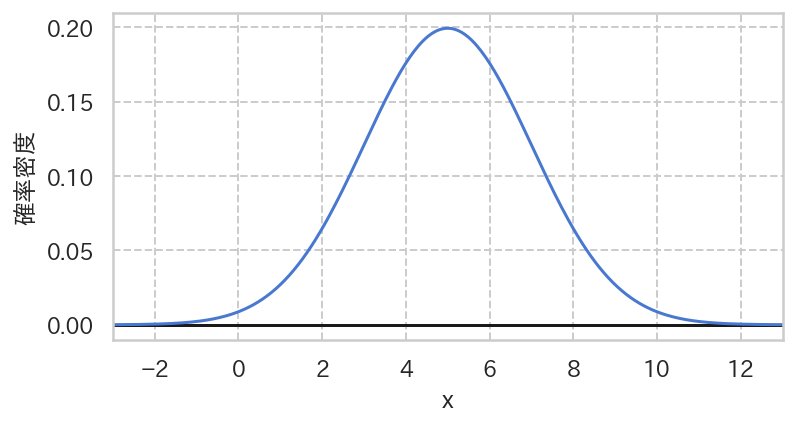

In [22]:
# コード12:scipyを使って正規分布の確率密度関数を描く
from scipy.stats import norm
xx = np.linspace(-3, 13, 301)
plt.figure(figsize=(6, 3))
plt.plot([-4, 14], [0, 0], c="k")
plt.plot(xx, norm.pdf(xx, loc=5, scale=2))
plt.xlabel("x")
plt.ylabel("確率密度")
plt.xlim(-3, 13)
plt.show()

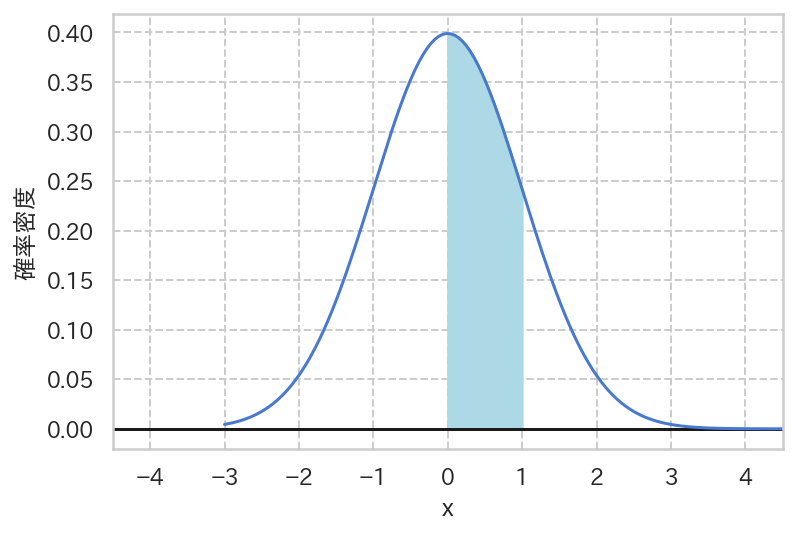

In [23]:
xx2 = np.linspace(0, 1, 101)

plt.plot([-5, 5], [0, 0], c="k")
plt.plot(xx, normal_distribution(xx, 0, 1))
plt.fill_between(xx2, normal_distribution(xx2, 0, 1), color="lightblue")
plt.xlabel("x")
plt.ylabel("確率密度")
plt.xlim(-4.5, 4.5)
plt.show()

* 図１４ 正規分布の $x=0$ から $x=1$ の範囲の確率を求める

In [24]:
norm.cdf(-0.5, 0, 1), norm.cdf(0, 0, 1), norm.cdf(1, 0, 1),

(0.3085375387259869, 0.5, 0.8413447460685429)

In [25]:
# コード13:正規分布のx=0からx=1の範囲の確率を求める
prob2 = norm.cdf(x=1, loc=0, scale=1)
prob3 = norm.cdf(x=0, loc=0, scale=1)
prob1 = prob2 - prob3
print(f"確率1: {prob1: .3f}, 確率2: {prob2: .3f}, 確率3: {prob3: .3f}")

確率1:  0.341, 確率2:  0.841, 確率3:  0.500


* 図１６ 正規分布を二項分布で近似するPythonコード

mu:2000.00, sigma:40.00


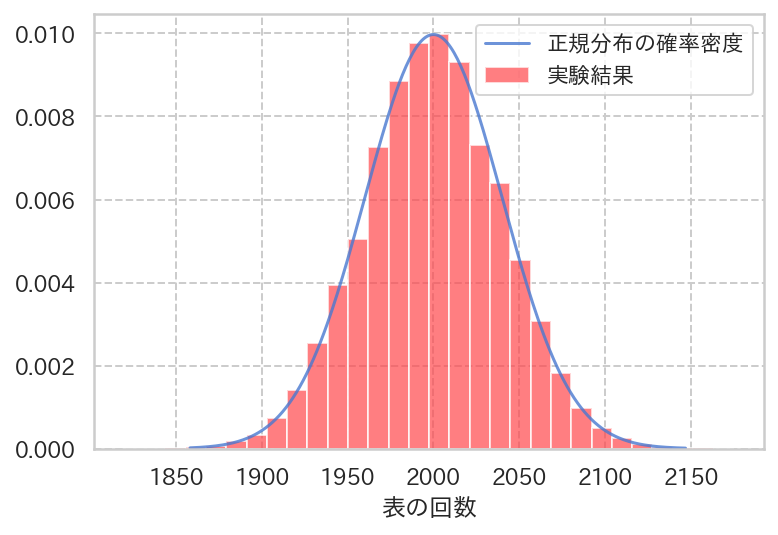

In [26]:
# コード14: 二項分布から正規分布の近似

# パラメーター
n = 10000
p = 0.2
trial_size = 100000

np.random.seed(71)
result = [gen_bern_var(n, p) for _ in range(trial_size)]
xx = np.arange(np.percentile(result, 0.01), np.percentile(result, 99.99))

mu = n * p
sigma = np.sqrt(n * p * (1 - p))
print(f"mu:{mu:.2f}, sigma:{sigma:.2f}")
plt.plot(xx, st.norm.pdf(xx, mu, sigma), alpha=0.8, label="正規分布の確率密度")

plt.hist(result, density=True, bins=30, color=sns.xkcd_rgb["light red"], label="実験結果", alpha=0.7)

plt.legend(loc="best")
plt.xlabel("表の回数")
plt.show()

標準正規分布

* 図１７ 正規分布に従うデータから定数を足し引きしたヒストグラム

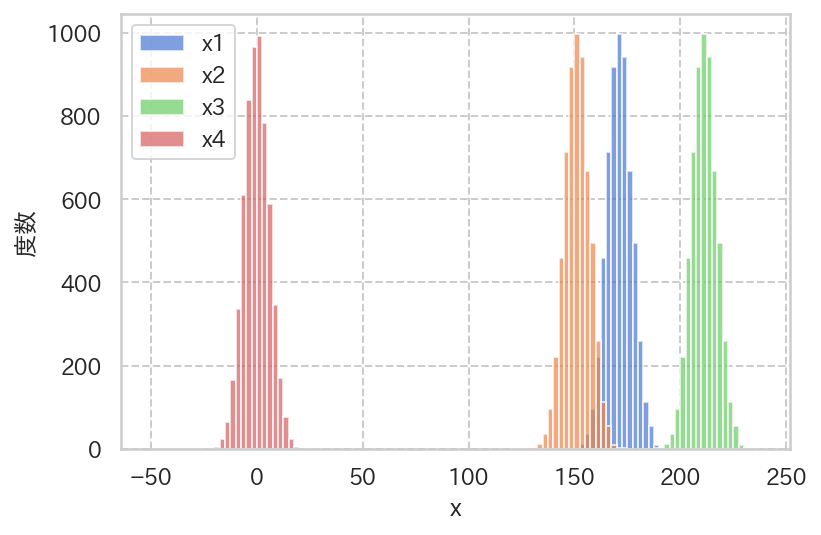

In [27]:
# コード15: 正規分布に従うデータから定数を足し引きしたヒストグラムを描画するコード

from scipy.stats import norm
n_data = 6000
x1 = norm.rvs(loc=171.4, scale=5.8, size=n_data)
x2 = x1 - 20
x3 = x1 + 40
x4 = x1 - np.mean(x1)

plt.figure(figsize=(6,4))
plt.hist(x1, bins=np.arange(140, 200, 2.5), alpha=0.7, label="x1")
plt.hist(x2, bins=np.arange(120, 180, 2.5), alpha=0.7, label="x2")
plt.hist(x3, bins=np.arange(180, 240, 2.5), alpha=0.7, label="x3")
plt.hist(x4, bins=np.arange(-50, 30, 2.5), alpha=0.7, label="x4")
plt.ylabel("度数")
plt.xlabel("x")
plt.legend(loc="upper left")
plt.show()

* 図１８ 平均0の正規分布に定数をかけたデータを作成するコード（グラフ描画に関係する部分は省略）

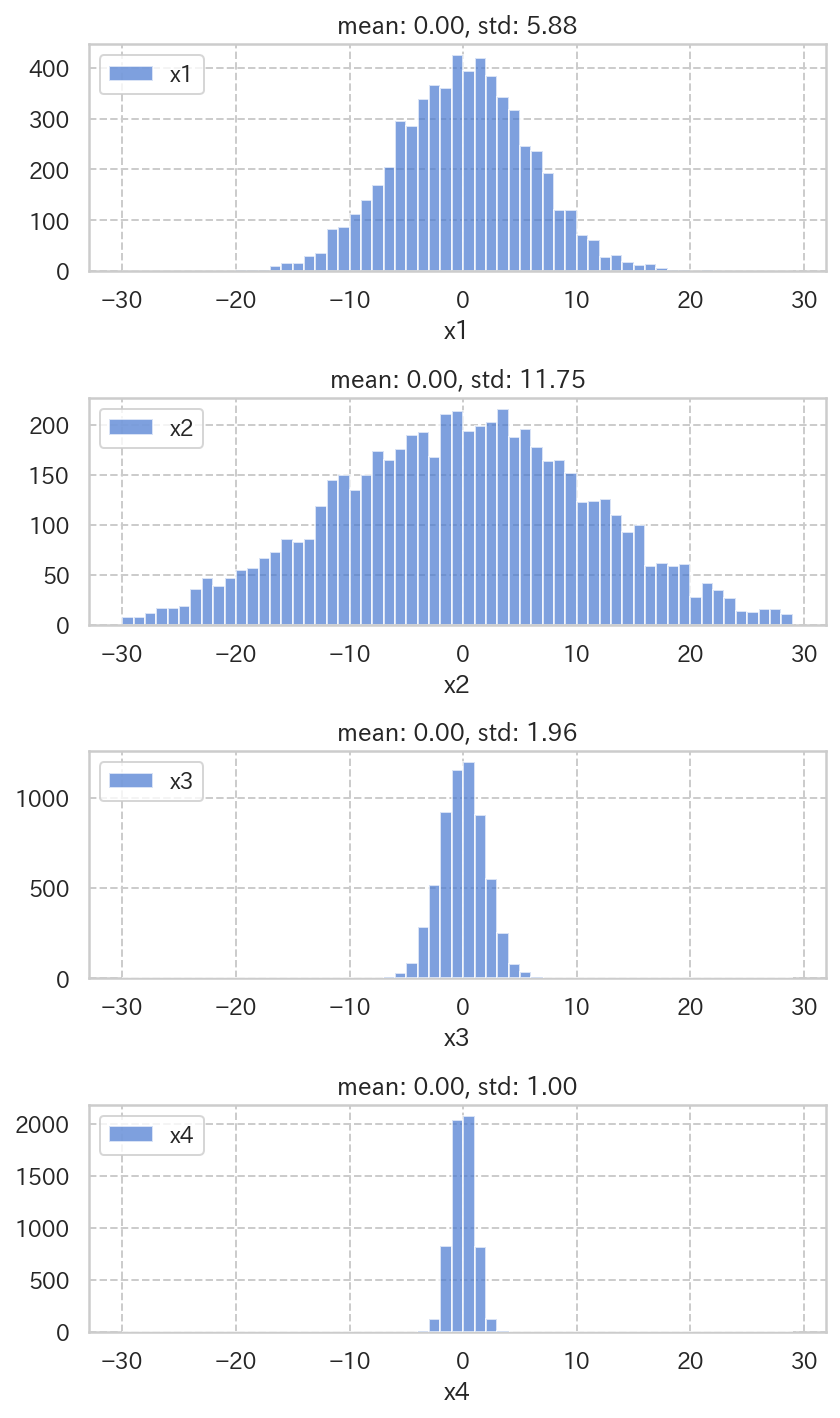

In [28]:
# コード16: 平均0の正規分布に定数をかけたデータを作成するコード
from scipy.stats import norm
n_data = 6000
x1 = norm.rvs(loc=171.4, scale=5.8, size=n_data)
x1 = x1 - np.mean(x1)
x2 = x1 * 2
x3 = x1 / 3
x4 = x1 / np.std(x1)

# -------------------------
plt.figure(figsize=(6,10))
bins = np.arange(-30, 30, 1)

# -------------------------
plt.subplot(411)
plt.hist(x1, bins=bins, alpha=0.7, label="x1", zorder=1)
plt.title(f"mean: {np.mean(x1):.2f}, std: {np.std(x1):.2f}")
plt.xlabel("x1")
plt.legend(loc="upper left")

# -------------------------
plt.subplot(412)
plt.hist(x2, bins=bins, alpha=0.7, label="x2", zorder=2)
plt.title(f"mean: {np.mean(x2):.2f}, std: {np.std(x2):.2f}")
plt.xlabel("x2")
plt.legend(loc="upper left")

# -------------------------
plt.subplot(413)
plt.hist(x3, bins=bins, alpha=0.7, label="x3", zorder=3)
plt.title(f"mean: {np.mean(x3):.2f}, std: {np.std(x3):.2f}")
plt.xlabel("x3")
plt.legend(loc="upper left")

# -------------------------
plt.subplot(414)
plt.hist(x4, bins=bins, alpha=0.7, label="x4", zorder=4)
plt.title(f"mean: {np.mean(x4):.2f}, std: {np.std(x4):.2f}")
plt.xlabel("x4")
plt.legend(loc="upper left")

# -------------------------
plt.tight_layout()
plt.show()